In [13]:
import numpy as np
from collections import defaultdict
import string
import heapq
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle
import os
import re

## Word2vec algorithm

In [2]:
class Word2Vec:
    def __init__(self, corpus, emb_dim=100, window_size=5, learning_rate=0.025):
        self.corpus = corpus
        self.emb_dim = emb_dim
        self.window_size = window_size
        self.learning_rate = learning_rate
        self.vocab = list(set(self.corpus))
        self.word_to_index = {w: i for i, w in enumerate(self.vocab)}
        self.index_to_word = {i: w for i, w in enumerate(self.vocab)}
        self.vocab_size = len(self.vocab)
        self.W1 = np.random.uniform(-0.8, 0.8, (self.vocab_size, self.emb_dim))
        self.W2 = np.random.uniform(-0.8, 0.8, (self.emb_dim, self.vocab_size))

    def generate_training_data(self):
        training_data = []
        for i, word in enumerate(self.corpus):
            for j in range(max(0, i - self.window_size), i):
                training_data.append((word, self.corpus[j]))
            for j in range(i + 1, min(i + self.window_size + 1, len(self.corpus))):
                training_data.append((word, self.corpus[j]))
        return training_data

    def one_hot(self, index):
        one_hot_vec = np.zeros(self.vocab_size)
        one_hot_vec[index] = 1
        return one_hot_vec

    def train(self, epochs):
        training_data = self.generate_training_data()
        for epoch in range(epochs):
            self.loss = 0
            for w, c in training_data:
                x = self.one_hot(self.word_to_index[w])
                y = self.one_hot(self.word_to_index[c])
                h = np.dot(x, self.W1)
                u = np.dot(h, self.W2)
                y_pred = self.softmax(u)
                error = y - y_pred
                self.loss += np.sum(error ** 2)
                dW2 = np.outer(h, error)
                dW1 = np.outer(x, np.dot(self.W2, error))
                self.W2 += self.learning_rate * dW2
                self.W1 += self.learning_rate * dW1
            print("Epoch %d, loss: %.4f" % (epoch+1, self.loss))

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0)

    def get_embedding(self, word):
        return self.W1[self.word_to_index[word]]
    
    def get_similar_words(self, word, n=5):
        if word not in self.vocab:
            return f"{word} not in vocabulary"
        
        word_emb = self.get_embedding(word)
        scores = {}
        for w in self.vocab:
            if w != word:
                emb = self.get_embedding(w)
                scores[w] = np.dot(word_emb, emb) / (np.linalg.norm(word_emb) * np.linalg.norm(emb))
        
        top_n = heapq.nlargest(n, scores, key=scores.get)
        return top_n

## Data : 

In [39]:
def remove_punctuation(text):
    # Remove all punctuation from the text using the string module
    no_punct = text.translate(str.maketrans("", "", string.punctuation + "\n"))
    return no_punct

def remove_numbers(text):
    text_without_digits = re.sub(r'\b\d+\b', '', text)
    return text_without_digits

def get_corpus(data_dir):
    corpus = ""

    for data_file in os.listdir(data_dir):
        with open(os.path.join(data_dir, data_file), "r", encoding="utf-8") as f:
            file_text = f.read()
            no_punct_text = remove_punctuation(file_text)
            corpus += remove_numbers(no_punct_text)

    return corpus
    

In [44]:
corpus = get_corpus('data/')
corpus

'Yeah Ndir bach wessani lwalid nkon rajel 3emri nmed lyeddMe7taj l d3awi lwalida Kent fel\u20059issem\u2005moujtahid f derbi\u2005moussalimDaba baghi nmout chahid Nefssi f\u2005nifi n3ich malik wakha fo9 2ardi gharibGhar9ine fel coke wel fanid   Wallah l7ayat kant ghayaKenna kankhal9oha b walo yamat pirori w marija Yeah Ndir bach wessani lwalid nkon rajel 3emri nmed lyeddMe7taj l d3awi lwalida Kent fel 9issem moujtahid f derbi moussalimDaba baghi nmout chahid   Nefssi f nifi n3ich malik wakha fo9 2ardi gharibGhar9ine fel coke wel fanid Wallah l7ayat kant ghayaKenna kankhal9oha b walo yamat pirori w marijaBezzaf hazzine f galbhom wakha l 2ibtissamaSa7bi f9edna l3echra men zellato lissanMimi yak galti liya l7ob machi sahelFinma nebghi nenssa nchoufek fel kissaanMachi blan hadchi hadchi machi blanSec fel kass w koulla chwiya khassni nebramMa tem3ich fel 7ob ldakhel kamline drabiWeld nass mais fel frach 9lil trabi   Hezzit b hbalhom 7ta 3yitKhyabit wakha ma ta3ischMa yemkench nmout bach ho

In [45]:
corpus = corpus.split()

In [48]:
model = Word2Vec(corpus, emb_dim=10, window_size=4, learning_rate=0.01)

In [49]:
#model.learning_rate = 0.1
model.train(epochs=50)

Epoch 1, loss: 17841.7993
Epoch 2, loss: 17766.6281
Epoch 3, loss: 17710.0858
Epoch 4, loss: 17680.6613
Epoch 5, loss: 17652.4021
Epoch 6, loss: 17618.6639
Epoch 7, loss: 17588.3376
Epoch 8, loss: 17557.2272
Epoch 9, loss: 17522.2373
Epoch 10, loss: 17487.5079
Epoch 11, loss: 17456.7399
Epoch 12, loss: 17430.6942
Epoch 13, loss: 17409.2435
Epoch 14, loss: 17391.3932
Epoch 15, loss: 17375.2366
Epoch 16, loss: 17359.6964
Epoch 17, loss: 17344.5460
Epoch 18, loss: 17329.9464
Epoch 19, loss: 17316.0829
Epoch 20, loss: 17302.9924
Epoch 21, loss: 17290.5818
Epoch 22, loss: 17278.6856
Epoch 23, loss: 17267.1526
Epoch 24, loss: 17255.8905
Epoch 25, loss: 17244.8258
Epoch 26, loss: 17233.8729
Epoch 27, loss: 17222.9516
Epoch 28, loss: 17212.0070
Epoch 29, loss: 17201.0106
Epoch 30, loss: 17189.9501
Epoch 31, loss: 17178.8190
Epoch 32, loss: 17167.6084
Epoch 33, loss: 17156.3065
Epoch 34, loss: 17144.9048
Epoch 35, loss: 17133.4056
Epoch 36, loss: 17121.8257
Epoch 37, loss: 17110.1933
Epoch 38, 

In [50]:
model.get_similar_words("nta")

['doz', 'tsali', 'fach', 'chwy', 'dnoubi']

## Vizualization using PCA

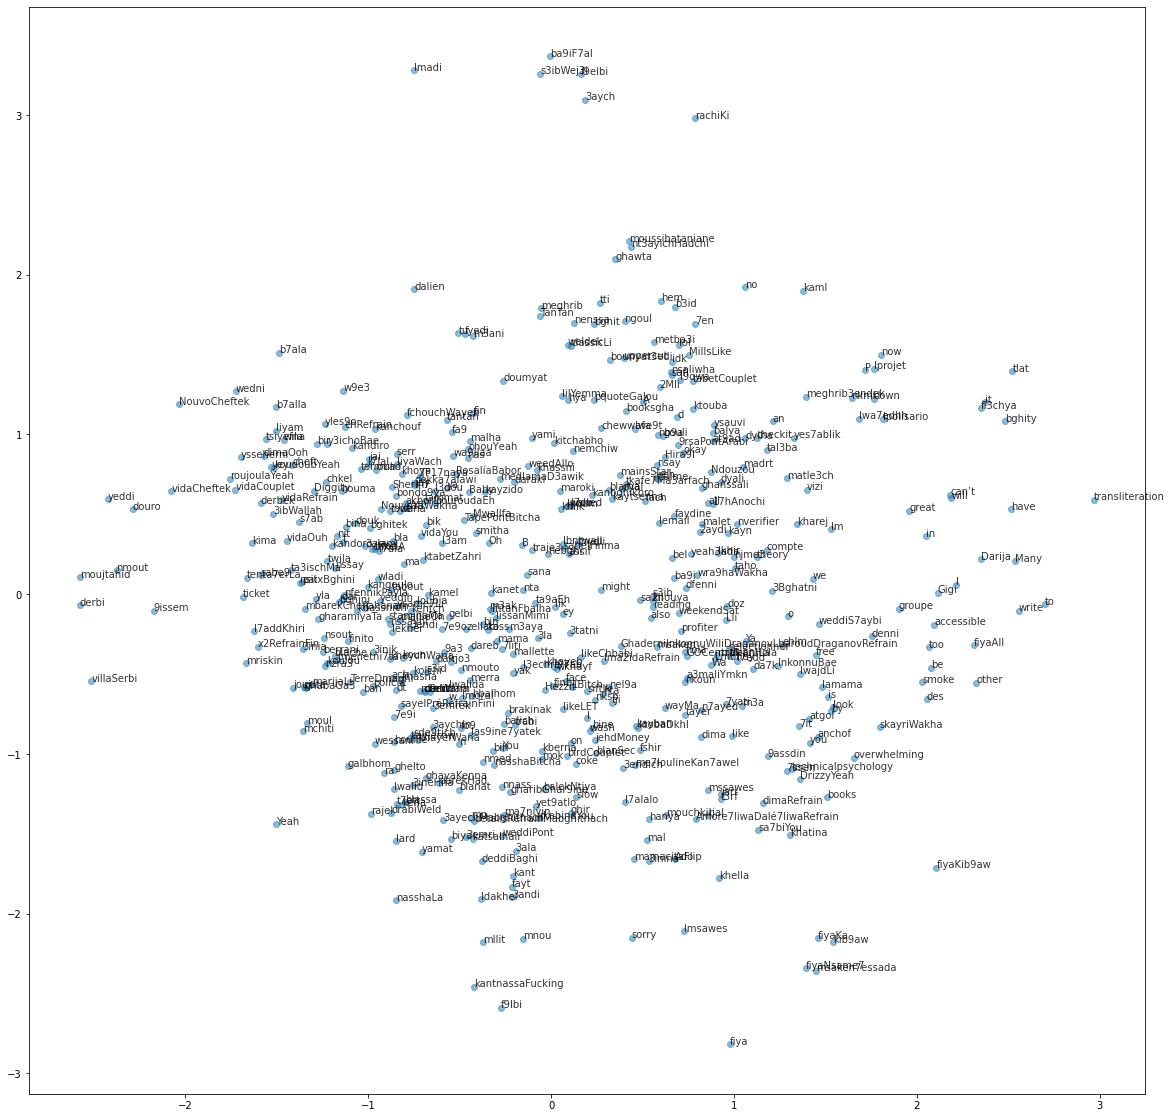

In [51]:
# Get the word vectors for a subset of the vocabulary
word_vectors = np.array([model.get_embedding(w) for w in model.vocab[:500]])

# Apply PCA to reduce the dimensionality of the word vectors
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)
plt.figure(figsize = (20,20))

# Plot the word vectors in 2D space
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], alpha=0.5)

# Label each point with its corresponding word
for i, word in enumerate(model.vocab[:500]):
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]), alpha=0.8)

plt.show()


## Playing with clusters 

Cluster  1 :  ['3ineHna', 'ghayaKenna', 'me7loulineKan7awel', 'galbhom', 'face', 'fo9', 'kant', 'yamat', 'coke', 'slow', 'nel9a', 'gharibGhar9ine', 'blad', 'marijaBezzaf', '2ardi', 'malik', 'fanid', 'moAna', 'pirori', '3ayniya', 'nifi', 'hazzine', '7liwaBatal', 'l7ayat', 'kankhal9oha', 'rrass', 'wel', 'your', 'Wallah', '9lil']
Cluster  2 :  ['fach', 'kayn', 'nverifier', 'o', 'free', 'doz', 'nta', 'njme3', 'great', 'weekendSat', 'ba9i', 'wch', 'malet', '17hAnochi', 'reading', 'ysauvi', 'kharej', 'lemail', 'will', 'dylha', 'it', 'calme', 'idk', 'selectionner', 'believe', '3ndiMmm', 'prime', 'chwy', 'if', 'his', 'zen9a', 'att', 'next', 'atl9a', 'abidi', 'reasonableMmm', 'but', 'normalement', 'Ill', 'tsali', 'chambre', 'dik', 'rap', 'howaChof', 'khlas', 'result', 'li3tatni', 'lforsa', 'twe7echtkomLmhm', 'i']
Cluster  3 :  ['9eddam', 'mbarekCheft', 'n', 'moul', 'ysseherni', 'koulou', 'lbntwaji', 'x2RefrainFin', 'berrani', 'mchiti', 'wahed', 'dayer', 'lcaméra', 'bayen', 'gha', 'kantsa2elKent

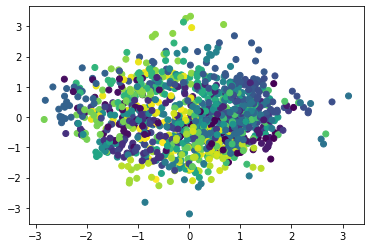

In [52]:
# Get the word embeddings from the model
word_embeddings = model.W1

# Use PCA to reduce the dimensionality of the embeddings to 2D for visualization
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(word_embeddings)

# Define the number of clusters
num_clusters = 30

# Use K-Means clustering to cluster the embeddings
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(word_embeddings)

# Get the cluster assignments for each word
cluster_assignments = kmeans.labels_

# Print the words in each cluster
for i in range(num_clusters):
    cluster_words = [word for j, word in enumerate(model.vocab) if cluster_assignments[j] == i]
    print("Cluster ", i+1, ": ", cluster_words)

# Visualize the clusters in 2D space
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_assignments)
plt.show()

In [92]:
with open('darija2vec.pkl', 'wb') as f:
    pickle.dump(model, f)

## get_similar_words

In [54]:
model.get_similar_words("ana")

['lfitanFbalha', 'twe7echtkomLmhm', 'mchghoul', 'dik', '7bithaKatgolli']

In [58]:
model.get_similar_words("wash")

['mok', 'so9', 'lm39ol', 'kayne', 'ba9a']

In [60]:
model.get_similar_words("kanbghik")

'kanbghik not in vocabulary'